In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ising_genetic import genetic_algorithm
from matplotlib import pyplot as plt

This is a work in progress and is not in a functioning state for now.

# Phase transition analysis

In this notebook, we use a genetic algorithm to compute a population of lowest energy states in the Ising model at a given temperature.

In [3]:
# Critical value
betac = 0.441

In [15]:
output_hot = genetic_algorithm(10, 0.1 * betac, 0.0, n_cycles=1_000, mutation_rate=0.5)
output_cold = genetic_algorithm(10, 2.0 * betac, 0.0, n_cycles=2_000, mutation_rate=0.5)

(array([  7.,  39., 132., 142., 193., 193., 123., 114.,  46.,  11.]),
 array([-4.40000000e-01, -3.52000000e-01, -2.64000000e-01, -1.76000000e-01,
        -8.80000000e-02, -5.55111512e-17,  8.80000000e-02,  1.76000000e-01,
         2.64000000e-01,  3.52000000e-01,  4.40000000e-01]),
 <BarContainer object of 10 artists>)

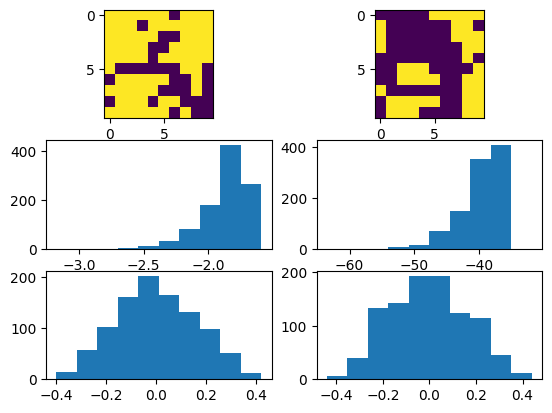

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=2)
axs[0, 0].imshow(output_hot["population"][0])
axs[0, 1].imshow(output_cold["population"][0])
axs[1, 0].hist(output_hot["benergies"])
axs[1, 1].hist(output_cold["benergies"])
axs[2, 0].hist(output_hot["magnetizations"])
axs[2, 1].hist(output_cold["magnetizations"])

In [ ]:
betas = np.linspace(0.01, 2.0, num=10) * betac
outputs = [genetic_algorithm(10, beta, 0.0, n_states=200) for beta in betas]

In [113]:
mags_average = [np.average(np.abs(output["magnetizations"])) for output in outputs]

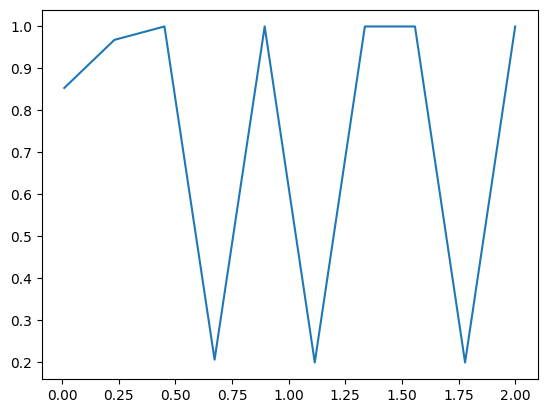

In [93]:
fig, ax = plt.subplots()
ax.plot(betas / betac, mags_average)